In [1]:
import time
import math

import numpy as np
from polylidar import MatrixDouble, Polylidar3D
from polylidar.polylidarutil import (generate_test_points, plot_triangles, get_estimated_lmax,
                                     plot_triangle_meshes, get_triangles_from_list, get_colored_planar_segments, plot_polygons)

from polylidar.polylidarutil import (plot_polygons_3d, generate_3d_plane, set_axes_equal, plot_planes_3d,
                                     scale_points, rotation_matrix, apply_rotation)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

### Basic 2D Polylidar

Took 1.44 milliseconds


<IPython.core.display.Javascript object>


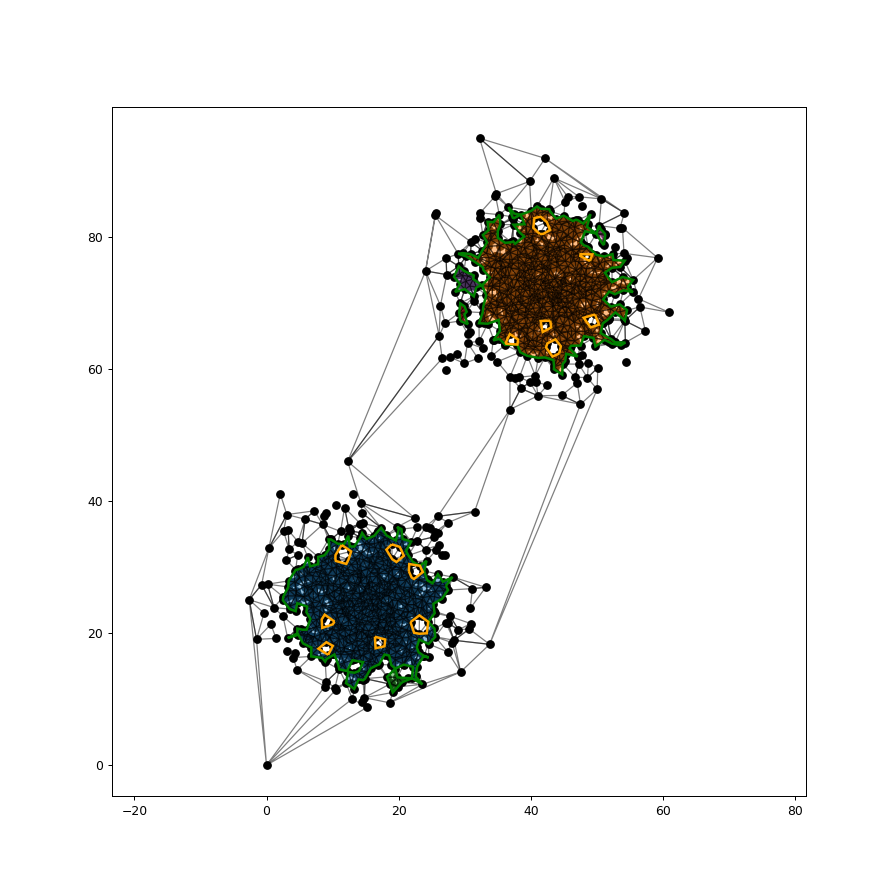

In [2]:
kwargs = dict(num_groups=2, group_size=1000, dist=100.0, seed=1)
# generate 2 random normally distributed clusters of points, 200 X 2 numpy array.
points = generate_test_points(**kwargs)
lmax = get_estimated_lmax(**kwargs)
polylidar_kwargs = dict(alpha=0.0, lmax=lmax, min_triangles=5)

# Convert points to matrix format (no copy) and make Polylidar3D Object
points_mat = MatrixDouble(points, copy=False)
polylidar = Polylidar3D(**polylidar_kwargs)

# Extract the mesh, planes, polygons, and time
t1 = time.perf_counter()
mesh, planes, polygons = polylidar.extract_planes_and_polygons(points_mat)
t2 = time.perf_counter()

print("Took {:.2f} milliseconds".format((t2 - t1) * 1000))

# Convert to numpy format, no copy with np.asarray()
triangles = np.asarray(mesh.triangles)

fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1)
# plot points
ax.scatter(points[:, 0], points[:, 1], c='k')
# plot all triangles
plot_triangles(get_triangles_from_list(triangles, points), ax)
# plot seperated planar triangular segments
triangle_meshes = get_colored_planar_segments(planes, triangles, points)
plot_triangle_meshes(triangle_meshes, ax)
# plot polygons
plot_polygons(polygons, points, ax)
plt.axis('equal')
plt.show()

### Basic 2.5D Polylidar

<IPython.core.display.Javascript object>


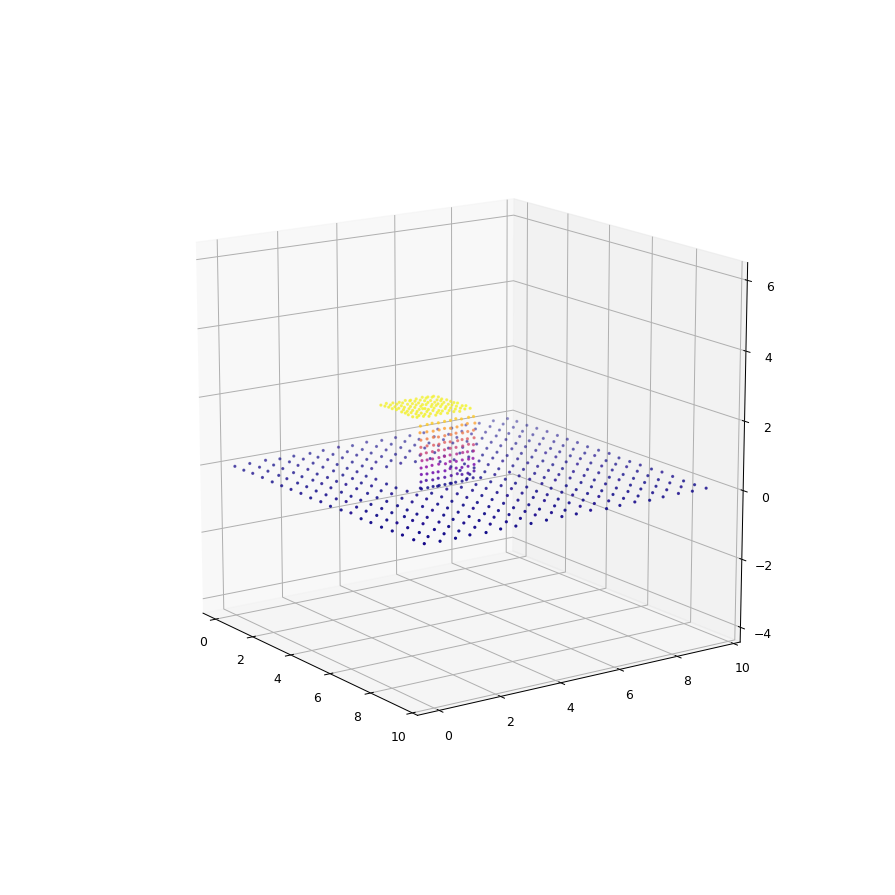

Took 0.31 milliseconds
Should see two planes extracted, please rotate.


<IPython.core.display.Javascript object>


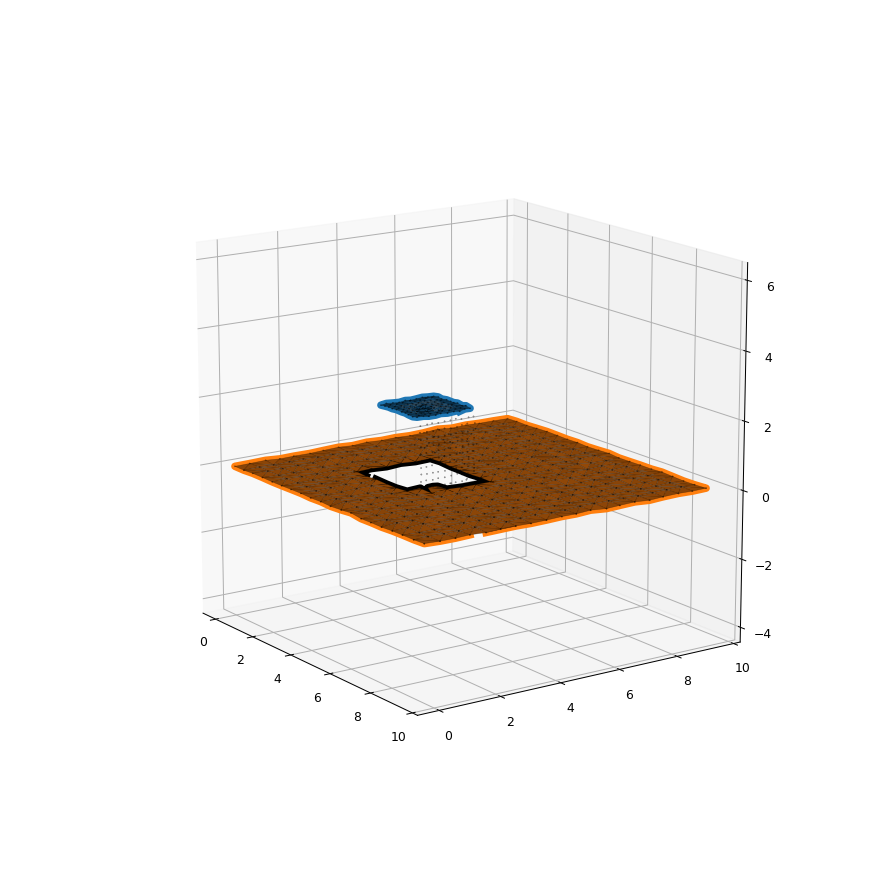

In [3]:
np.random.seed(1)
# generate random plane with hole
plane = generate_3d_plane(bounds_x=[0, 10, 0.5], bounds_y=[0, 10, 0.5], holes=[
    [[3, 5], [3, 5]]], height_noise=0.02, planar_noise=0.02)
# Generate top of box (causing the hole that we see)
box_top = generate_3d_plane(bounds_x=[3, 5, 0.2], bounds_y=[3, 5, 0.2], holes=[
], height_noise=0.02, height=2, planar_noise=0.02)
# Generate side of box (causing the hole that we see)
box_side = generate_3d_plane(bounds_x=[0, 2, 0.2], bounds_y=[
    0, 2, 0.2], holes=[], height_noise=0.02, planar_noise=0.02)
rm = rotation_matrix([0, 1, 0], -math.pi / 2.0)
box_side = apply_rotation(rm, box_side) + [5, 3, 0]
# All points joined together
points = np.concatenate((plane, box_side, box_top))

points_mat = MatrixDouble(points)
polylidar_kwargs = dict(alpha=0.0, lmax=1.0, min_triangles=20, z_thresh=0.1, norm_thresh_min=0.94)
polylidar = Polylidar3D(**polylidar_kwargs)

fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1,
                       subplot_kw=dict(projection='3d'))
# plot points
ax.scatter(*scale_points(points), s=2.5, c=points[:, 2], cmap=plt.cm.plasma)
set_axes_equal(ax)
ax.view_init(elev=15., azim=-35)
plt.show()

# Extracts planes and polygons, time
t1 = time.time()
mesh, planes, polygons = polylidar.extract_planes_and_polygons(points_mat)
t2 = time.time()
print("Took {:.2f} milliseconds".format((t2 - t1) * 1000))
print("Should see two planes extracted, please rotate.")

triangles = np.asarray(mesh.triangles)
fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1,
                       subplot_kw=dict(projection='3d'))
# plot all triangles
plot_planes_3d(points, triangles, planes, ax)
plot_polygons_3d(points, polygons, ax)
# plot points
ax.scatter(*scale_points(points), c='k', s=0.1)
set_axes_equal(ax)
ax.view_init(elev=15., azim=-35)
plt.show()
print("")